In [3]:
# Imports and Loading the Saved Model

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
model = joblib.load('../models/best_lead_scoring_model.pkl')

# Load the original cleaned data for testing/scoring
df = pd.read_csv('../data/cleaned_sales_leads_dataset.csv')
lead_ids = df['lead_id']  # Keep IDs for the final report

# Prepare the data same way it was prepared during training
df_temp = df.drop(columns=['lead_id'])
df_encoded = pd.get_dummies(df_temp, drop_first=True)

# Separate features for prediction
X = df_encoded.drop('converted', axis=1)
y = df_encoded['converted']

print(f"Data loaded: {len(df)} leads")
print(f"Features: {X.shape[1]} columns")

Data loaded: 1000 leads
Features: 30 columns


In [4]:
#Generating Lead Scores
# Get probabilities for the "Converted" class (index 1)
# Note: This works for Logistic Regression and most classifiers
probabilities = model.predict_proba(X)[:, 1]

# Convert probability to a 0-100 score
df['lead_score'] = (probabilities * 100).round(2)

print("Lead Scores generated successfully.")

Lead Scores generated successfully.


In [5]:
# Creating the Lead Prioritization Matrix
# Define threshold rules [cite: 106]
def prioritize(score):
    if score >= 70:
        return 'High'
    elif score >= 40:
        return 'Medium'
    else:
        return 'Low'

# Apply the categorization
df['priority_level'] = df['lead_score'].apply(prioritize)

# Display the top 10 most promising leads
print("--- Lead Prioritization Matrix Preview ---")
print(df[['lead_id', 'lead_score', 'priority_level']].sort_values(by='lead_score', ascending=False).head(10))

--- Lead Prioritization Matrix Preview ---
       lead_id  lead_score priority_level
11   LEAD_0012       100.0           High
998  LEAD_0999       100.0           High
997  LEAD_0998       100.0           High
996  LEAD_0997       100.0           High
19   LEAD_0020       100.0           High
16   LEAD_0017       100.0           High
15   LEAD_0016       100.0           High
960  LEAD_0961       100.0           High
506  LEAD_0507       100.0           High
492  LEAD_0493       100.0           High


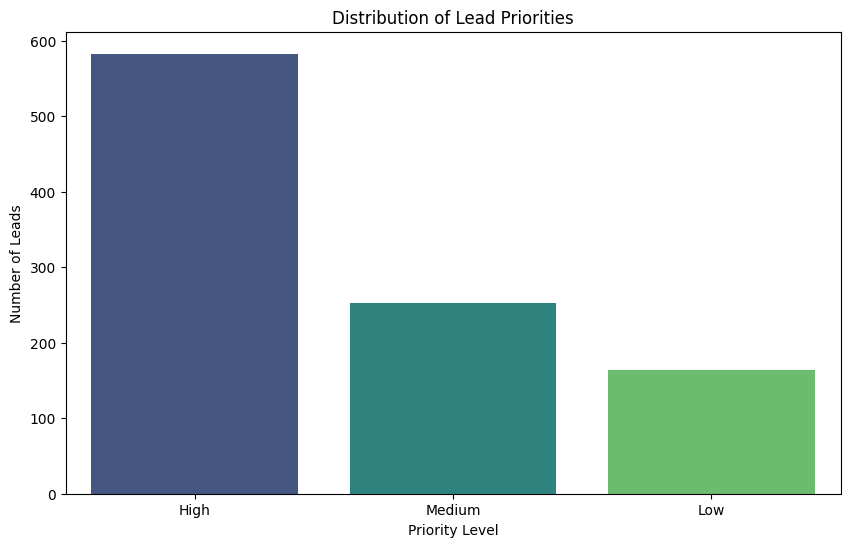

Summary:
priority_level
High      583
Medium    253
Low       164
Name: count, dtype: int64


In [6]:
#Visualizing the Sales Funnel
# Count leads in each priority level
priority_counts = df['priority_level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=priority_counts.index, 
    y=priority_counts.values, 
    hue=priority_counts.index, 
    palette='viridis', 
    legend=False
)
plt.title('Distribution of Lead Priorities')
plt.xlabel('Priority Level')
plt.ylabel('Number of Leads')
plt.show()

print(f"Summary:\n{priority_counts}")

In [7]:
#Generating Automated Lead Quality Reports
# Create a clean report for the Sales Team
sales_report = df[['lead_id', 'industry', 'location', 'lead_score', 'priority_level']]

# Save to CSV [cite: 107]
sales_report.to_csv('daily_lead_prioritization_report.csv', index=False)

print("Automated Lead Quality Report saved to:daily_lead_prioritization_report.csv")

Automated Lead Quality Report saved to:daily_lead_prioritization_report.csv
